<a href="https://colab.research.google.com/github/markbojic/parallel-alg/blob/main/Project1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

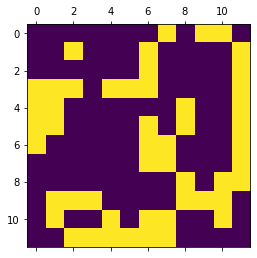

In [ ]:
import numpy as np
import threading
import time
import random
import sys
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from IPython.display import HTML
from random import randrange
from threading import Thread, Event
from queue import Queue, Empty

n = 12
vals = [0,1]
stateMatrix = np.random.choice(vals, n*n, p = [0.5,0.5]).reshape(n,n)
cell_matrix = []
steps = []
count = 0
tf = []

class Cell(Thread):
  def __init__(self, row, col, state, inner_queue):
    Thread.__init__(self)
    self.row = row
    self.col = col 
    self.state = state
    self.inner_queue = inner_queue


  def run(self):
      global cell_matrix
      global count
      global stateMatrix
      for i in cell_matrix:
        #Ako je celija sused onda joj posalji svoj state
        if(i.row == self.row and i.col == (self.col - 1) % n):
          i.inner_queue.put(self.state)
          i.inner_queue.task_done()
        if(i.row == self.row and i.col == (self.col + 1) % n):
          i.inner_queue.put(self.state)
          i.inner_queue.task_done()
        if(i.row == (self.row - 1) % n and i.col == (self.col - 1) % n):
          i.inner_queue.put(self.state)
          i.inner_queue.task_done()
        if(i.row == (self.row - 1) % n and i.col == (self.col + 1) % n):
          i.inner_queue.put(self.state)
          i.inner_queue.task_done()
        if(i.row == (self.row + 1) % n and i.col == (self.col - 1) % n):
          i.inner_queue.put(self.state)
          i.inner_queue.task_done()
        if(i.row == (self.row + 1) % n and i.col == (self.col + 1) % n):
          i.inner_queue.put(self.state)
          i.inner_queue.task_done()
        if(i.row == (self.row - 1) % n and i.col == self.col):
          i.inner_queue.put(self.state)
          i.inner_queue.task_done()
        if(i.row == (self.row + 1) % n and i.col == self.col):
          i.inner_queue.put(self.state)
          i.inner_queue.task_done()
            
      living = 0
      for i in range(8):
        living += self.inner_queue.get()

      self.state = calculateNewState(self.state, living)
      stateMatrix[self.row][self.col] = self.state
      count = count + 1
      if(count == n*n):
        steps.append(stateMatrix.astype(np.int8))
        count = 0


def calculateNewState(oldState, total):
  x = total
  
  if(oldState == 0 and (x == 3)): 
    return 1
  
  if((x < 2) or (x > 3)):
    return 0
  
  if(oldState == 1 and ((x == 2) or (x == 3))):
    return 1
  return 0


def start(steps1):
  steps.append(stateMatrix.astype(np.int8))
  for step in range(steps1):
    cell_matrix.clear()
    tf.clear()
    for i in range(n):
      for j in range(n):
        q = Queue(maxsize=8)
        c = Cell(i, j, stateMatrix[i][j], q)
        tf.append(c)
        cell_matrix.append(c)
    np.reshape(cell_matrix,(n, n))
    for t in tf:
      t.start()
    for t in tf:
      t.join()


def animate(steps):
  def init():
    im.set_data(steps[0])
    return [im]
  
  def animate(i):
    im.set_data(steps[i])
    return [im]

  im = plt.matshow(steps[0], interpolation='None', animated=True);
  
  anim = FuncAnimation(im.get_figure(), animate, init_func=init,
                  frames=len(steps), interval=500, blit=True, repeat=False);
  return anim

start(10)

anim = animate(steps);
HTML(anim.to_html5_video())